<a href="https://colab.research.google.com/github/sungholim-uos/first/blob/master/01_numpy_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housekeeping



-   Grades for attendance, weekly exercises, and a final project
-   Classes and weekly exercises will be given in jupyter notebook form
    through github classrooms, you should upload your answers to github each week
-   We will often need access to a gpu.
    -   There are gpus on the pcs in the classroom, if you are happy to
        figure out installing/using pytorch and jupyter on your own
    -   You can use google colab, for which you can turn on gpu/tpus, and
        has easy download/upload to github, and it has the libraries
        already installed
-   You will need a github account and a google account (if you use colab)
-   Sign up to the first classroom: go to the url and follow the instructions
    -   [https://git.io/2020deep01](https://git.io/2020deep01)
-   Send an email if you need help with any of this!
    -   Some more info on using colab is at the end of the file



## Introduction - Machine Learning



-   **Machine learning** refers to sets of algorithms (techniques) that
    can "learn" from experience
-   Given inputs and expected output can automatically learn to
    associate patterns in the input to the output and generalize on
    unseen inputs.
-   As opposed to traditional algorithms which are explicitly programmed
    to always act in specific ways
-   Example: Does this signal in my detector correspond to a photon or a
    hadron? Feed the algorithm thousands of (simulated) photons &
    hadrons, and it will learn to distinguish them
    -   That is, you build a parameterized model which describes the
        outputs of photons vs. hadrons, and the algorithms changes the
        parameters to better describe the photons or hadron examples you
        feed it
-   Ask for my previous lecture slides on machine learning, if you need
    a more basic introduction



## Introduction - Deep Learning



-   *Deep learning* - **learning** refers to machine learning, **deep**
    refers to a special property of the technique but generally means
    the technique operates on much lower level information than older
    machine learning algorithms, and goes through multiple levels of
    processing (all automated by the learning algorithms, of course)
-   Ex: in the old days (pre-2012), image recognition might proceed by first using
    specialized edge detectors feeding to specialized shape detectors
    feeding to machine learning algorithms operating on high level
    info. Today, we would just feed raw pixels into a deep learning
    algorithm and let it figure out the intermediate representations.



## Introduction - Deep Learning Applications



-   Typical applications include:
-   Voice recognition: "Hey Siri" vs all the other phrases you say
    around a phone
-   Image classification: cat vs dog, or photon vs hadron
-   Image segmentation: draw a box around all the people in this image,
    or e.g. all the galaxies in this image from the Hubble telescope
-   Machine translation: this series of utterances in Korean correspond
    to these in English
-   Hopefully, you can see how some of these could be useful to us in
    science



## Numpy



-   We will be using the `pytorch` deep learning library in this course
    -   These days `pytorch` is the most used library by ML researchers
-   Need some preliminaries before we start using `pytorch`
-   Numpy is a python package providing one main type `ndarray` a fast
    n-dimensional array, and various linear algebra operations for it
-   Important for us for two reasons
    -   pytorch's `Tensor` type has an API based on `numpy`
    -   `ndarray` is used an intermediate in creating and using `Tensor` objects
-   Can think of this lesson as a warm-up before seeing the `torch` library
    -   Also to make sure we're all comfortable with python and writing code
-   First question we'll look at: why do we need a special array type?

-   **Reference** <span class="underline">[Introduction To NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)</span> from "Python Data Science Handbook"
    -   Flip through it for more info/exercises



## Python vs C: Integers



![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/images/cint_vs_pyint.png?raw=1)

-   In C (or other *low-level* language, ex. `fortran`) you deal directly with the
    computers memory: operations happen at the speed of the CPU
-   Python uses *boxed* types, additional information, such as the type
    of the object is included **in memory** (each python object is a
    `PyObject` *struct* in memory)
    -   C **code** contains type information, which is used by the compiler
        to generate machine code, but this information is **not**
        (explicitly) part of the machine code
-   Python must *unbox* these representations and choose operations
    based on the types of the objects, this is the interpreter's job
-   This means python code is, perforce, slower than C code



## Python vs C: lists



![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/images/array_vs_list.png?raw=1)

-   Similarly, a C `int` array can be laid out one integer after another
    in memory, and then operated on knowing only the size of `int` and
    the start of the array
-   A python list, on the other hand, is a `PyObject` with a pointer to
    the list of objects in the list, each object is again a `PyObject`
-   Consider `a[0] + a[0]` in C and in python
    -   In python, both the list object and the objects themselves are boxed



## Benefits of NumPy



![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/images/array_vs_list.png?raw=1)

-   Uses a native array datatype
    -   A `PyObject`, with some bookkeeping, but pointing directly to a C array
-   Provides functions that operate over the $n$-dim. arrays efficiently
    -   Built on top of highly-optimised linear algebra packages like BLAS
-   *Note:* you can become just as inefficient if you program your loops
    manually, **always use the built-in numpy operations when you can**



## Basic Operations: Creating arrays in numpy



Directly from a python array



In [0]:
import numpy as np
np.array([1,2,3,4])

array([1, 2, 3, 4])

With functions taking a *shape*: tuple of sizes along each dimension



In [0]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [0]:
np.ones((1,2,3))

array([[[1., 1., 1.],
        [1., 1., 1.]]])

Shape goes from outermost brackets to innermost. All `numpy` objects
carry their `shape`



In [0]:
a = np.ones((1,2,3))
print(a.shape)

(1, 2, 3)

## Creating arrays in numpy and reshaping



With more specialized functions



In [0]:
np.linspace(0,1,5) # 5 element array evenly-spaced from 0 to 1 inclusive

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [0]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can `reshape` arrays to give a different view (of the same
underlying array)



In [0]:
np.arange(10).reshape((2,5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

You can flatten an array (of any dimensions) to one dimension with `ravel`



In [0]:
np.arange(4*2*4*2).reshape((4,2,4,2)).ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

## Array Indexing



-   You can index numpy arrays as normal lists, but also you can put
    multiple dimensions in one bracket with commas



In [0]:
np.arange(10)[2:4]

array([2, 3])

In [0]:
np.arange(100).reshape((10,10))[2:4,1:3]

array([[21, 22],
       [31, 32]])

In [0]:
np.arange(100).reshape((10,10))[2:4,:] # ':' to access the whole dimension

array([[20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

Note, you're operating on subarrays, when you modify these, you modify the original array also!



In [0]:
a = np.linspace(0,1,5)
b = a[2:4] # make a subview of the array
b[0] = 101.101
a

array([  0.   ,   0.25 , 101.101,   0.75 ,   1.   ])

## Functions with numpy arrays



`numpy` has many functions to operate on arrays, they often generalize
standard functions to apply to the whole array. Standard math
functions apply element-wise



In [0]:
np.array([1,2,3,4]) + np.array([5,6,7,8])

array([ 6,  8, 10, 12])

`sin`, `cos`, `exp`, `log`, etc are available and run element-wise over an array



In [0]:
np.sin(np.linspace(0,np.pi/2.,4))

array([0.       , 0.5      , 0.8660254, 1.       ])

You can `transpose` matrices



In [0]:
np.array([ [1,1.1], [2,2.1], [3,3.1], [4,4.1] ]).transpose()

array([[1. , 2. , 3. , 4. ],
       [1.1, 2.1, 3.1, 4.1]])

You should use the built-in functions when available and never iterate
over an array in python! You'll lose all the benefits of numpy



## Broadcasting



You can also apply arguments in more complicated ways, for example,
you can add a matrix by a row vector, so that each row in the matrix
is added element-wise by the vector



In [0]:
v = np.array([1,2,3,4])
m = np.array([ [1,2,3,4], [5,6,7,8], [3,4,5,6] ])
m+v

array([[ 2,  4,  6,  8],
       [ 6,  8, 10, 12],
       [ 4,  6,  8, 10]])

This is called *broadcasting* an operation.

The rules are:

-   The lower dimension of the two inputs is padded to be the same
    dimension, missing dimensions added on the left with size 1
-   Any dimension of size 1 in either array is increased to the same
    size as the other array, by copying the elements
-   If the two arrays don't match size after this, then an error is thrown



## Broadcasting examples



This allows e.g. adding or multiplying by a scalar, interpreted as a
shape `(1,)` array



In [0]:
# the scalar is shape (1,), so it gets expanded to (1,1): [[1,i]]
# then copied out to (2,2): [[1,1], [1,1]]
np.array([ [1,2], [3,4] ]) + 1

array([[2, 3],
       [4, 5]])

In [0]:
# the vector is shape (2,), so it gets expanded to (1,2): [[5,6]]
# then copied out to (2,2): [[5,6],[5,6]]
np.array([ [1,2], [3,4] ]) + np.array([5,6])

array([[ 6,  8],
       [ 8, 10]])

In [0]:
# the vector is shape (2,), so it gets expanded to (1,2): [[5,6]]
# then copied out to (2,2): [[5,6],[5,6]]
# The matrix is shape (2,1) so it will be expanded to (2,2): [[1,1],[3,3]]
np.array([ [1,], [3,] ]) + np.array([5,6])

array([[6, 7],
       [8, 9]])

Broadcasting is an important concept in numpy, get used to it by
playing around with variously shaped arrays and try
adding/multiplying/etc.



## A little matplotlib



You can plot 1d functions with `matplotlib.pyplot.plot(x,y)`.

`x` and `y` should be arrays of the same length



#+attr_latex: :width .495\textwidth

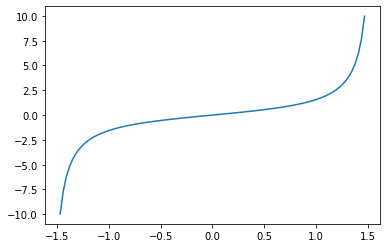

In [0]:
import matplotlib.pyplot as plt
x = np.linspace(-np.pi/2+0.1,np.pi/2.-0.1,100)
y = np.tan(x)
plt.plot(x, y)

## Exercises



The exercises are included in the ipynb in the repository, you should
do all the exercises and save it to github for marking (see the
following pages for instructions on how to use colab).

`numpy` gives a full range of linear algebra functions operating on
arrays. The exercises will review a few basic operations and go
through some of the linear algebra functions available.

If you need more help, try looking through the:

-   **Reference** <span class="underline">[Introduction To NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)</span> from "Python Data Science Handbook"

Run this first to import `numpy`. The output value of the final line
of the cell block will be shown in the results section. Note that all
cells are run in a single python interpreter, so variables you define
will remain across cells. If you get into a bad state (e.g. you create
an infinite loop), you can restart the interpreter again by choosing
"Runtime" then "Restart runtime". If you do this, all state will be
lost, so you will need to rerun all the cells.



In [0]:
import numpy as np

Try running this and see what happens. Is it helpful?



In [0]:
?np.sin

Object `np.sin` not found.


Now create a 1D array, filled with 5 0s, i.e. the output should show
`array([0., 0., 0., 0., 0.])`



In [0]:
np.array((0.,0.,0.,0.,0.))

array([0., 0., 0., 0., 0.])

Create a 1D array with the numbers 1-6. Reshape it to a 3x2 array (3
rows, 2 columns) with rows 1,2 then 3,4, then 5,6



In [0]:
np.arange(1,7).reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

Create a 1D array with the numbers 1-6. Reshape it to a 3x2 array (3
rows, 2 columns) with rows 1,4 then 2,5, then 3,6 (i.e. columns 1,2,3
and 4,5,6). It shouldn't take more than 2 function calls after you
create the array.



In [0]:
np.arange(1,7).reshape(2,3).T

array([[1, 4],
       [2, 5],
       [3, 6]])

Use `matplotlib.pyplot` and `numpy`'s trig functions to draw the `log`
function from 0.1 to 2. Make sure to sample `log` from enough points
to get a smooth curve. You'll need to import `matplotlib`.



In [2]:
import matplotlib.pyplot as plt
import math

# Using 2 arrays and scale of x from 0.1 to 2

x=np.arange(0.1,2,0.01)
y=np.log(np.arange(0.1,2,0.01))

 # print("Using 2 arrays and scale of x from 0.1 to 2")
 # plt.plot(x,y)

# Using 1 array and scale of y from 0.1 to 2

data=np.array((np.arange(pow(np.e,0.1),pow(np.e,2),0.01),np.log(np.arange(pow(np.e,0.1),pow(np.e,2),0.01))))

print("Using 1 array and scale of y from 0.1 to 2")
plt.plot(data[0],data[1])


NameError: ignored

Draw `sin` and `cos` between 0 and &pi; (on one plot)



No handles with labels found to put in legend.


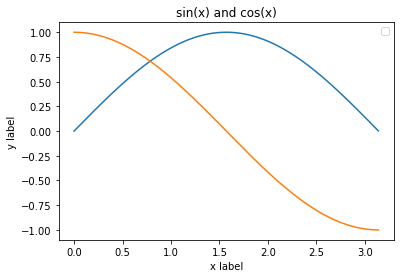

In [0]:
data=np.array((np.arange(0,np.pi,0.01),np.sin(np.arange(0,np.pi,0.01)),np.cos(np.arange(0,np.pi,0.01))))

fig, ax = plt.subplots()
ax.plot(data[0],data[1])
ax.plot(data[0],data[2])
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('sin(x) and cos(x)')
ax.legend()


Create an array of 1 to 10, multiply each element of the array by 5.



In [0]:
np.arange(1,11)*5   

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

Create a 3x3 matrix like this:
$$A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$$
multiply each element by 3



In [0]:
A= np.arange(1,10).reshape(3,3)
A*3

array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

With the same initial matrix $A$ from the last cell, multiply each
**row** by $(1,2,3)$ (**not** matrix multiplication)



In [0]:
A * np.array((1,2,3))

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

With the same initial matrix $A$ from the last cell, multiply each
**column** by $x=(1,2,3)$ (**not** matrix multiplication) (you'll have to
reshape x somehow)



In [0]:
x=np.array((1,2,3))
A*x.reshape(3,1)

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

Now, do the standard matrix-vector multiplication $(Ax)_i = \sum_j
A_{ij} x_j$ with A and x from the previous questions. `numpy.matmul`
can do matrix-style multiplication



In [0]:
np.matmul(A,x)

array([14, 32, 50])

Create a matrix where each element is the square of the corresponding
element of A



In [0]:
np.square(A)

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

Now, find $A^2$ using matrix multiplication



In [0]:
# What do you mean by A^2 in matrix multiplication

np.matmul(A,A)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

*Using* numpy arrays, sum the numbers from 1 to 1000 (inclusive,
(meaning, include the endpoints)).



In [0]:
np.sum(np.arange(1,1001))

500500

Using numpy arrays, and sum all the multiples of 3 or 5 from 1
to 1000.

[A shorter example: If we list all the numbers between 1 and 10 that
are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these
multiples is 23.]

[ If you don't know how to start, look up the help for `np.vectorize`
and `np.sum` (look for `where`) ]



In [21]:
x=np.arange(1001)
index=np.vectorize(lambda x: x%3==0 or x%5==0)(x)
x.sum(where=index)

234168

In [123]:
%%time
x = np.arange(1001)
i=np.vectorize(lambda x: x%3==0 or x%5==0)(x)
print(x.sum(where=i))

234168
CPU times: user 406 µs, sys: 978 µs, total: 1.38 ms
Wall time: 1.25 ms


In [18]:
%%time

sum = 0
for i in range(1001):
    if (i%3==0 or i%5==0):sum+=i

print(sum)


234168
CPU times: user 543 µs, sys: 0 ns, total: 543 µs
Wall time: 1.13 ms


Some extra space for you to play around with plotting functions,
testing numpy broadcasting, and so on. Remember to save to github when
you're finished!



No handles with labels found to put in legend.


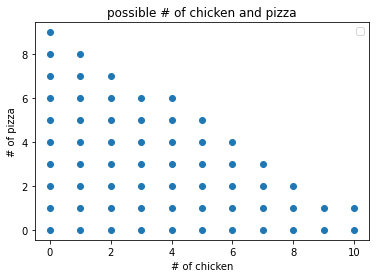

In [165]:
 # Plotting Chicken-Pizza curve

# How many chickens and pizza could I order with my budget $180

import matplotlib.pyplot as plt
import numpy as np

budget= 180  #bucks

price=np.array([16,19]) #bucks

xv=np.array(np.meshgrid(np.arange(budget//chicken),np.arange(budget/pizza))).T.reshape(-1,2)

index=np.matmul(xv,price)<=180

selected=xv[index].T

fig, ax = plt.subplots()
ax.scatter(selected[0],selected[1])
ax.set_xlabel('# of chicken')
ax.set_ylabel('# of pizza')
ax.set_title('possible # of chicken and pizza')


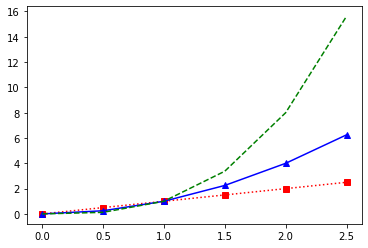

In [171]:
# Draw few lines in one graph

points=np.arange(0,3,0.5)
plt.plot(points,points,'rs:',points,points**2,'b^-',points,points**3,'g--')
plt.show()

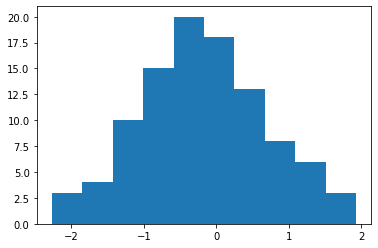

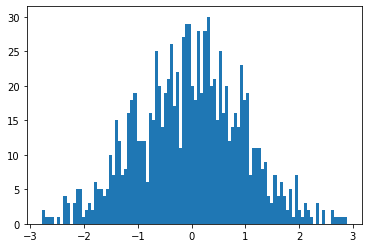

In [185]:
sample=np.random.randn(100)
#plt.plot(sample)
plt.hist(sample,bins=10)
plt.show()

sample=np.random.randn(1000)
#plt.plot(sample)
plt.hist(sample,bins=100)
plt.show()

You can list all the objects in numpy and see if theres anything
interesting to you:



In [0]:
for obj in dir(np):
  print(obj)

#+begin_example
  ALLOW_THREADS
  AxisError
  BUFSIZE
  CLIP
  ComplexWarning
  DataSource
  ERR_CALL
  ERR_DEFAULT
  ERR_IGNORE
  ERR_LOG
  ERR_PRINT
  ERR_RAISE
  ERR_WARN
  FLOATING_POINT_SUPPORT
  FPE_DIVIDEBYZERO
  FPE_INVALID
  FPE_OVERFLOW
  FPE_UNDERFLOW
  False_
  Inf
  Infinity
  MAXDIMS
  MAY_SHARE_BOUNDS
  MAY_SHARE_EXACT
  MachAr
  ModuleDeprecationWarning
  NAN
  NINF
  NZERO
  NaN
  PINF
  PZERO
  RAISE
  RankWarning
  SHIFT_DIVIDEBYZERO
  SHIFT_INVALID
  SHIFT_OVERFLOW
  SHIFT_UNDERFLOW
  ScalarType
  Tester
  TooHardError
  True_
  UFUNC_BUFSIZE_DEFAULT
  UFUNC_PYVALS_NAME
  VisibleDeprecationWarning
  WRAP
  _NoValue
  _UFUNC_API
  __NUMPY_SETUP__
  __all__
  __builtins__
  __cached__
  __config__
  __doc__
  __file__
  __git_revision__
  __loader__
  __name__
  __package__
  __path__
  __spec__
  __version__
  _add_newdoc_ufunc
  _distributor_init
  _globals
  _mat
  _pytesttester
  abs
  absolute
  absolute_import
  add
  add_docstring
  add_newdoc
  add_newdoc_ufun

## Colab Instructions



-   You need to have a goole account to use colab
-   You should also have a <span class="underline">[https://github.com](https://github.com)</span> account, which is how I
    will mark each weeks assignments
-   Sign up for the exercise, it will *fork* (copy) the *repository*
    (codebase) into your github account
-   You should follow along the notebook (the document includes the
    lecture notes, and exercises at the bottom of the file) and write
    the solutions into colab, then *commit* (save) your changes for
    marking
-   The following pages will take you through the process to load the
    notebook, write your code, and save to github, so the notebook can
    be marked
-   <span class="underline">[https://colab.research.google.com/](https://colab.research.google.com/)</span>



## Colab Instructions



Login to colab and choose open notebook

[![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/open_notebook.png?raw=1)](open_notebook.png)



## Colab Instructions



You will see a table of options, choose "github"

[![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/choose_github.png?raw=1)](choose_github.png)



## Colab Instructions



Select "include private repos", this will open a pop-up (make sure to
allow pop ups!) which asks you to sign into github to link you github
to colab. Sign in with your github account details

[![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/private_repo.png?raw=1)](private_repo.png)



## Colab Instructions



Go to the github repository created when you signed up to class. Find
the github name of your repository (you need the full name, which is
your github name '/' the repository name)

[![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/repo_name.png?raw=1)](repo_name.png)



## Colab Instructions



Enter the *full* repo name in the search, choose the repo in the list
and click the ipynb notebook when it finds your repo (it will need to
authorize github again to open, so wait a minute; ignore the "errors"
and wait)

[![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/search_repo.png?raw=1)](search_repo.png)



## Colab Instructions



Now you can run your code (scroll down, and click on the "hidden cell"
to reveal them, example shown). Type the code into the boxes and click
the arrow or type "SHIFT+ENTER" to run the code (the first time it
will bring up a warning, click 'run anyway')

[![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/write_code.png?raw=1)](write_code.png)



## Colab Instructions



When you're done (or need to take a break), save it back to github,
you can reload the repo later (from the "previous notebooks" tab, to
save some time) and it should have all the saved changes. Save as
often as you want, run as much code as you want, its at github and
google's expense!

[![img](https://github.com/uos-computing-for-particle-physics/01-numpy-sungholim-uos/blob/master/save_github.png?raw=1)](save_github.png)

